<a href="https://colab.research.google.com/github/Supreme-YS/data_analysis/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.tree         import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# SVM add
from sklearn.svm          import SVC

# Knn add
from sklearn.neighbors    import KNeighborsClassifier

# ensemble add
from sklearn.ensemble     import VotingClassifier
from sklearn.ensemble     import RandomForestClassifier



from sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score, cross_val_predict

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve , roc_curve

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# datasets
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml(data_id=554)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
mnist.data.shape

(70000, 784)

In [6]:
mnist.target.shape

(70000,)

In [7]:
mnistDF = pd.DataFrame(mnist.data,
                       columns = mnist.feature_names)

In [8]:
mnistDF['target'] = mnist.target

In [9]:
y_target = mnistDF['target']
X_features = mnistDF.drop(['target'], axis =1, inplace=False)

In [10]:
X_features.shape, y_target.shape

((70000, 784), (70000,))

In [11]:
X, y = mnist['data'], mnist['target']
y = y.astype(np.int8)

In [12]:
type(X), type(y) , X.shape, y.shape

(numpy.ndarray, numpy.ndarray, (70000, 784), (70000,))

In [ ]:
reshape_img = X[1].reshape(28, 28)
reshape_img

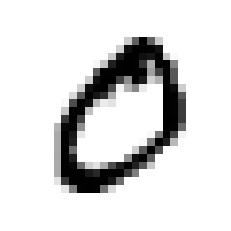

In [14]:
plt.imshow(reshape_img, cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [15]:
y[1]

0

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000: ], y[:60000], y[60000:]

In [17]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [18]:
# 데이터를 섞어주는 작업 ( shuffle )
shuffle = np.random.permutation(60000)
X_train, y_train = X_train[shuffle], y_train[np.random.permutation(shuffle)]
#shuffle

In [ ]:
# 테스트
X_test, y_test

In [20]:
dt = DecisionTreeClassifier(random_state=35)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [21]:
print('tree : ', accuracy_score(y_test, dt_pred))

tree :  0.1016


In [22]:
# 이진 분류를 위해서
# 7
y_train_seven = (y_train == 7)
y_train_seven

array([False, False, False, ..., False, False, False])

In [23]:
# 확률적 경사하강법(SGD) - stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state = 50)
sgd_model.fit(X_train, y_train_seven)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=50, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
sgd_model.predict([X[7]])

array([False])

In [26]:
# 교차 검증 cross_val_score()
scores = cross_val_score(sgd_model,X_train, y_train_seven, cv=5, scoring='accuracy' )
scores

array([0.82116667, 0.89491667, 0.89533333, 0.87725   , 0.79566667])

In [27]:
np.mean(scores)

0.8568666666666667

In [30]:
y_scores = cross_val_predict(sgd_model,X_train, y_train_seven, cv=5, method='decision_function' )
y_scores

array([-2298.46572415, -1876.64962626, -1373.87822718, ...,
       -1132.61304646,  -188.82104497, -2851.43574759])

In [32]:
precision, recall, thresholds = precision_recall_curve(y_train_seven, y_scores)
precision, recall, thresholds

(array([0.10444974, 0.10443481, 0.10443655, ..., 0.        , 0.        ,
        1.        ]),
 array([1.        , 0.99984038, 0.99984038, ..., 0.        , 0.        ,
        0.        ]),
 array([-7415.37848368, -7390.61834108, -7385.66452227, ...,
         2278.23211111,  2392.05263046,  2512.3113801 ]))

In [33]:
precision.shape, recall.shape, thresholds.shape

((59982,), (59982,), (59981,))

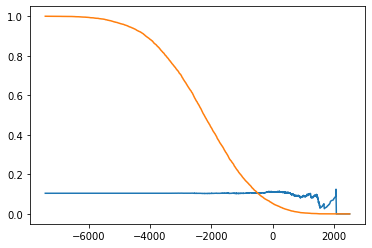

In [37]:
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='precision')
plt.show()